# SKIN DETECTION  

### Come trovare in un'immagine i pixel corrispondenti alla pelle umana e analisi sulle differenze della media RGB di una serie di immagini raffiguranti pelle e non. 

#### Brizzi Lorenzo (Collaboratore Camillo Ballestrasse) 

La skin detection è una tecnica di pre-processing classica che permette di identificare in modo rapido porzioni di immagini che dovrebbero contenere  persone, vengono utilizzati come spazi di colore `HSV` (Tonalità, saturazione, valore) e `YCbCr` (Y componente di luminosità, Cb e Cr di crominanza cioè la differenza dal verde nel campo del blu e del rosso, rispettivamente).  

Un elemento fondamentale usato in questo laboratorio è la `sogliatura`, un semplice metodo per segmentare un'immagine, da un'immagine a livelli di grigio, la sogliatura restituisce un'immagine binaria. Questo metodo verrà utilizzato per distinguere i pixel dell'immagine relativi alla pelle dagli altri. 

# Obiettivi

- Mostrare alcuni tipi di sogliatura e osservare le differenze tra di esse. 

- Individuare i pixel corrispondenti alla pelle in due spazi di colore di due diverse immagini raffiguranti persone, mostrando le difficoltà nel caso in cui vi siano due persone dalle tonalità di pelle diverse. 

- Analizzare graficamente i valori RGB medi di un'insieme di immagini raffiguranti pelle  e uno raffiguranti altro e osservare le differenze. 

In [1]:
import cv2 as cv2
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

# Prima immagine

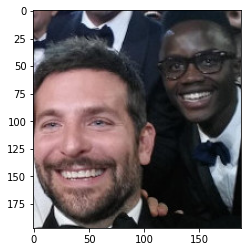

In [2]:
img = cv2.imread('images/BC.jpeg') 
RGB_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(RGB_img);

# Sogliatura

#### Usando tre diversi metodi di sogliatura (Global thresholding, Adaptive Mean thresholding, Adaptive Gaussian thresholding) vado a introdurre l'argomento. 

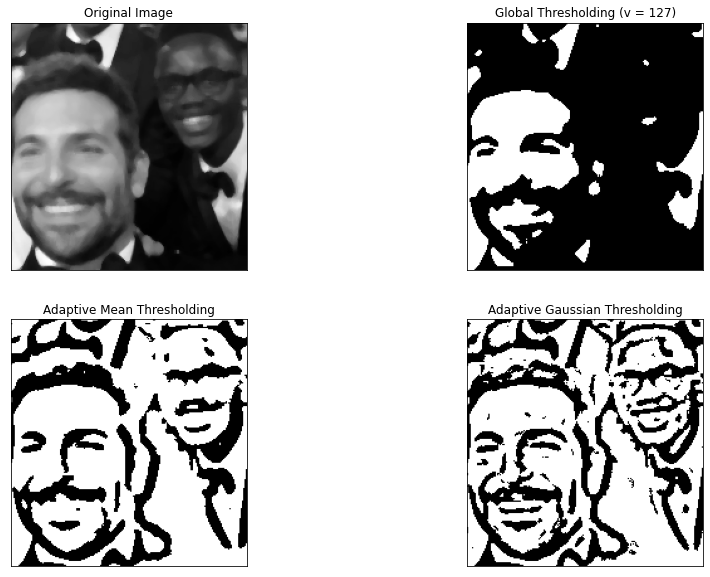

In [3]:
#converto l'immagine in scala di grigi e applico un filtro blur per limitare il rumore nell'immagine
img1 = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img1 = cv2.medianBlur(img1,5)

#Global thresholding
ret,th1 = cv2.threshold(img1,127,255,cv2.THRESH_BINARY)
#Adaptive Mean thresholding
th2 = cv2.adaptiveThreshold(img1, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 21, 10)
#Adaptive Gaussian thresholding
th3 = cv2.adaptiveThreshold(img1, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 21, 4)

titles = ['Original Image', 'Global Thresholding (v = 127)', 'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
plt.figure(figsize=(15,10))
images = [img1, th1, th2, th3]
for i in range(4):
    plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

Nella primo caso abbiamo utilizzato un valore globale come soglia (Global Thresholding (v = 127)). Ma questo potrebbe non essere buono in tutti i casi, ad es. se un'immagine ha condizioni di illuminazione diverse in aree diverse. In tal caso, l'Adaptive Thresholding può aiutare. Qui, l'algoritmo determina la soglia per un pixel in base a una piccola regione attorno ad esso. Quindi otteniamo soglie diverse per diverse regioni della stessa immagine che danno risultati migliori per immagini con illuminazione variabile.
Distinguiamo due tipi di Adaptive Thresholding:
- `Adaptive Mean Thresholding`: il valore di soglia è la media dei valori di prossimità meno la costante C
- `Adaptive Gaussian Thresholding`: il valore di soglia è una somma ponderata gaussiana dei valori di prossimità meno la costante C.

# Metodo

- Sfruttando openCV converto l'immagine nello spazio di colore desiderato (HSV, YCbCr) 

- Si definiscono i limiti inferiore e superiore delle intensità di pixel HSV considerabili "skin" 

- Si crea la maschera e vi si applicano alcune funzioni offerte da openCV per andare a approssimare il risultato finale rimuovendo quanto possibile il rumore (GaussianBlur, dilate e erode) 

- Applico la maschera all'immagine e estraggo da quest'ultima solo l'insieme di pixel di pelle 

- Vado a ripetere il processo con lo spazio YCbCr cambiando i valori di limite. 

- Infine ripeto il tutto usando un immagine da me proposta, cambiando anche in questo caso i valori in modo da ottenere un risultato ottimale. 


- Andrò poi ad importare e analizzare i valori medi RGB di immagini raffiguranti varie tonalità di pelle e immagini di altri colori, per poter visualizzare meglio i risultati plotto diversi grafici sfruttando anche la funzione regplot di seaborn (che permette di visualizzare una relazione lineare determinata attraverso la regressione) 

# HSV 

In [4]:
#converting to HSV
HSV_img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

# define the upper and lower boundaries of the HSV pixel
# intensities to be considered 'skin'
lower = np.array([0, 36, 40],np.uint8)
upper = np.array([61, 160, 255],np.uint8)

#create skin mask
skinMaskHSV = cv2.inRange(HSV_img, lower, upper)

# blur the mask to help remove noise
skinMaskHSV = cv2.GaussianBlur(skinMaskHSV, (3, 3), 0)

#approximates the mask
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (11, 11))
skinMaskHSV = cv2.erode(skinMaskHSV, kernel, iterations =0)
skinMaskHSV = cv2.dilate(skinMaskHSV, kernel, iterations =1)

# apply the mask to the frame
HSV_skin = cv2.bitwise_not(img, mask = skinMaskHSV)
HSV_skin = cv2.bitwise_not(HSV_skin, mask = None)
HSV_skin = cv2.cvtColor(HSV_skin, cv2.COLOR_BGR2RGB)

# YCrCb 

In [5]:
#set the parameters to detect skin color
lower= np.array([11, 122, 129],np.uint8)
upper= np.array([161, 155, 155],np.uint8)

#get image
YCrCb_img = cv2.cvtColor(img,cv2.COLOR_BGR2YCR_CB)

#create skin mask
skinMaskYCrCb = cv2.inRange(YCrCb_img , lower, upper)

# blur the mask to help remove noise
skinMaskYCrCb = cv2.GaussianBlur(skinMaskYCrCb, (3, 3), 0)

#approximates the mask
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (11, 11))

skinMaskYCrCb = cv2.dilate(skinMaskYCrCb, kernel, iterations = 2)
skinMaskYCrCb = cv2.erode(skinMaskYCrCb, kernel, iterations = 3)

#applies the mask to the image
YCrCb_skin = cv2.bitwise_not(img, mask = skinMaskYCrCb)
YCrCb_skin = cv2.bitwise_xor(YCrCb_skin, img, mask = None)

#convert the image into RGB
YCrCb_skin = cv2.cvtColor(YCrCb_skin, cv2.COLOR_BGR2RGB)


# Seconda immagine

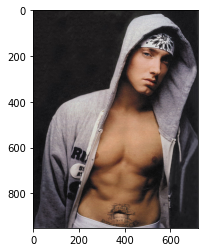

In [6]:
img2 = cv2.imread('images/Eminem.jpg') 
RGB_img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
plt.imshow(RGB_img2);

# HSV 

In [7]:
#converting to HSV
HSV_img2 = cv2.cvtColor(img2 , cv2.COLOR_BGR2HSV)

# define the upper and lower boundaries of the HSV pixel
# intensities to be considered 'skin'
lower = np.array([0, 46, 40],np.uint8)
upper = np.array([61, 180, 220],np.uint8)

#create skin mask
skinMaskHSV2 = cv2.inRange(HSV_img2, lower, upper)

#blur the mask to help remove noise
skinMaskHSV2 = cv2.GaussianBlur(skinMaskHSV2, (3, 3), 0)

#approximates the mask
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (11, 11))
skinMaskHSV2 = cv2.erode(skinMaskHSV2, kernel, iterations =1)
skinMaskHSV2 = cv2.dilate(skinMaskHSV2, kernel, iterations =1)

# apply the mask to the frame
HSV_skin2 = cv2.bitwise_not(img2 , mask = skinMaskHSV2)
HSV_skin2 = cv2.bitwise_not(HSV_skin2, mask = None)
HSV_skin2 = cv2.cvtColor(HSV_skin2, cv2.COLOR_BGR2RGB)

# YCrCb

In [8]:
#set the parameters to detect skin color
lower= np.array([11, 100, 124],np.uint8)
upper= np.array([255, 173, 145],np.uint8)

#get image
YCrCb_img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2YCR_CB)

#create skin mask
skinMaskYCrCb2 = cv2.inRange(YCrCb_img2 , lower, upper)

# blur the mask to help remove noise
skinMaskYCrCb2 = cv2.GaussianBlur(skinMaskYCrCb2, (3, 3), 0)

#approximates the mask
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (11, 11))

skinMaskYCrCb2 = cv2.erode(skinMaskYCrCb2, kernel, iterations = 1)
skinMaskYCrCb2 = cv2.dilate(skinMaskYCrCb2, kernel, iterations = 1)

#applies the mask to the image
YCrCb_skin2 = cv2.bitwise_not(img2, mask = skinMaskYCrCb2)
YCrCb_skin2 = cv2.bitwise_xor(YCrCb_skin2, img2, mask = None)

#convert the image into RGB
YCrCb_skin2 = cv2.cvtColor(YCrCb_skin2, cv2.COLOR_BGR2RGB)

# Analisi sperimentale

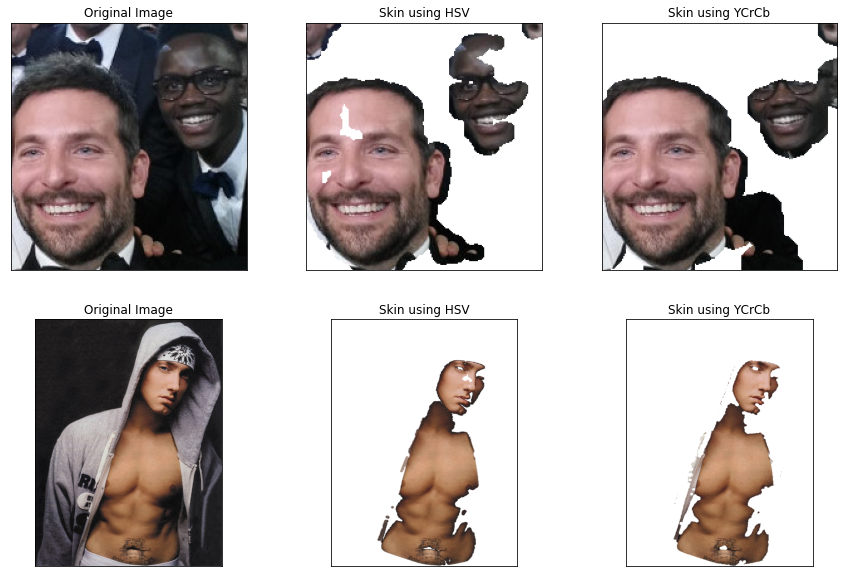

In [9]:
plt.figure(figsize=(15,10))

titles = ['Original Image', 'Skin using HSV','Skin using YCrCb',
          'Original Image', 'Skin using HSV','Skin using YCrCb']

images = [RGB_img, HSV_skin, YCrCb_skin, RGB_img2, HSV_skin2, YCrCb_skin2]
for i in range(6):
    plt.subplot(2,3,i+1),plt.imshow(images[i])
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

Andando ad osservare la prima immagine proposta salta all'occhio come l'utilizzo delle sogliatura in entrambi i piani di colore, nonostante le numerose approssimazioni, non sia efficiente nel dividere la pelle delle persone raffigurate dall'ambiente circostante. Questo è causato, oltre che da punti di scarsa luminosità dell'immagine come si può ben vedere nella secondo caso, dalla presenza di due persone dalle tonalità di pelle molto diverse. Infatti risulta difficile ritagliare accuratamente il volto in primo piano senza far sparire l'altro. Infatti, per includere nell'intervallo HSV o YCbCr entrambi, si vanno a prendere anche altri colori non corrispondenti a quelli della sola pelle. 

HSV e YCbCr hanno permesso di ottenere risultati molto simili come è evidente nella seconda immagine. Nella prima la scelta complicata di valori ha portato a un utilizzo importante dei filtri morfologici erode e dilate che ha portato a un risultato peggiore in YCrCb. 

Importante notare che i valori usati per trovare il colore della pelle cambiano molto in base a molti fattori, come l'illuminazione dell'immagine e la tonalità della pelle del soggetto (infatti i valori usati per la prima immagine non davano buoni risultati per la seconda e viceversa). 

# Calcolo della media

### dei valori RGB prese un'insieme di immagini raffiguranti la pelle in diverse tonalità

In [10]:
image_bgr = cv2.imread('images/pelle/pelle1.jpg', cv2.IMREAD_COLOR)
channels1 = cv2.mean(image_bgr)

image_bgr = cv2.imread('images/pelle/pelle2.jpg', cv2.IMREAD_COLOR)
channels2 = cv2.mean(image_bgr)

image_bgr = cv2.imread('images/pelle/pelle3.jpg', cv2.IMREAD_COLOR)
channels3 = cv2.mean(image_bgr)

image_bgr = cv2.imread('images/pelle/pelle4.jpg', cv2.IMREAD_COLOR)
channels4 = cv2.mean(image_bgr)

image_bgr = cv2.imread('images/pelle/pelle5.jpg', cv2.IMREAD_COLOR)
channels5 = cv2.mean(image_bgr)

image_bgr = cv2.imread('images/pelle/pelle6.jpg', cv2.IMREAD_COLOR)
channels6 = cv2.mean(image_bgr)

image_bgr = cv2.imread('images/pelle/pelle7.jpg', cv2.IMREAD_COLOR)
channels7 = cv2.mean(image_bgr)

image_bgr = cv2.imread('images/pelle/pelle8.jpg', cv2.IMREAD_COLOR)
channels8 = cv2.mean(image_bgr)

image_bgr = cv2.imread('images/pelle/pelle9.jpg', cv2.IMREAD_COLOR)
channels9 = cv2.mean(image_bgr)

image_bgr = cv2.imread('images/pelle/pelle10.jpg', cv2.IMREAD_COLOR)
channels10 = cv2.mean(image_bgr)

image_bgr = cv2.imread('images/pelle/pelle11.jpg', cv2.IMREAD_COLOR)
channels11 = cv2.mean(image_bgr)

image_bgr = cv2.imread('images/pelle/pelle12.jpg', cv2.IMREAD_COLOR)
channels12 = cv2.mean(image_bgr)

image_bgr = cv2.imread('images/pelle/pelle13.jpg', cv2.IMREAD_COLOR)
channels13 = cv2.mean(image_bgr)

image_bgr = cv2.imread('images/pelle/pelle14.jpg', cv2.IMREAD_COLOR)
channels14 = cv2.mean(image_bgr)

image_bgr = cv2.imread('images/pelle/pelle15.jpg', cv2.IMREAD_COLOR)
channels15 = cv2.mean(image_bgr)

image_bgr = cv2.imread('images/pelle/pelle16.jpg', cv2.IMREAD_COLOR)
channels16 = cv2.mean(image_bgr)

image_bgr = cv2.imread('images/pelle/pelle17.jpg', cv2.IMREAD_COLOR)
channels17 = cv2.mean(image_bgr)

image_bgr = cv2.imread('images/pelle/pelle18.jpg', cv2.IMREAD_COLOR)
channels18 = cv2.mean(image_bgr)

image_bgr = cv2.imread('images/pelle/pelle19.jpg', cv2.IMREAD_COLOR)
channels19 = cv2.mean(image_bgr)

image_bgr = cv2.imread('images/pelle/pelle20.jpg', cv2.IMREAD_COLOR)
channels20 = cv2.mean(image_bgr)

image_bgr = cv2.imread('images/pelle/pelle21.jpg', cv2.IMREAD_COLOR)
channels21 = cv2.mean(image_bgr)

image_bgr = cv2.imread('images/pelle/pelle22.jpg', cv2.IMREAD_COLOR)
channels22 = cv2.mean(image_bgr)

image_bgr = cv2.imread('images/pelle/pelle23.jpg', cv2.IMREAD_COLOR)
channels23 = cv2.mean(image_bgr)

image_bgr = cv2.imread('images/pelle/pelle24.jpg', cv2.IMREAD_COLOR)
channels24 = cv2.mean(image_bgr)

image_bgr = cv2.imread('images/pelle/pelle25.jpg', cv2.IMREAD_COLOR)
channels25 = cv2.mean(image_bgr)

print("creo un array con i valori rgb medi di 25 immagini riffiguranti diverse tonalità di pelle")
arrayR = np.array([channels1[2],channels2[2],channels3[2],channels4[2],channels5[2],channels6[2],channels7[2],channels8[2],channels9[2],channels10[2],channels11[2],channels12[2],channels13[2],channels14[2],channels15[2],channels16[2],channels17[2],channels18[2],channels19[2],channels20[2],channels21[2],channels22[2],channels23[2],channels24[2],channels25[2]])
arrayG = np.array([channels1[1],channels2[1],channels3[1],channels4[1],channels5[1],channels6[1],channels7[1],channels8[1],channels9[1],channels10[1],channels11[1],channels12[1],channels13[1],channels14[1],channels15[1],channels16[1],channels17[1],channels18[1],channels19[1],channels20[1],channels21[1],channels22[1],channels23[1],channels24[1],channels25[1]])
arrayB = np.array([channels1[0],channels2[0],channels3[0],channels4[0],channels5[0],channels6[0],channels7[0],channels8[0],channels9[0],channels10[0],channels11[0],channels12[0],channels13[0],channels14[0],channels15[0],channels16[0],channels17[0],channels18[0],channels19[0],channels20[0],channels21[0],channels22[0],channels23[0],channels24[0],channels25[0]])


creo un array con i valori rgb medi di 25 immagini riffiguranti diverse tonalità di pelle


In [11]:
image_bgr = cv2.imread('images/nopelle/sweat1.jpg', cv2.IMREAD_COLOR)
channels1 = cv2.mean(image_bgr)

image_bgr = cv2.imread('images/nopelle/sweat2.jpg', cv2.IMREAD_COLOR)
channels2 = cv2.mean(image_bgr)

image_bgr = cv2.imread('images/nopelle/sweat3.jpg', cv2.IMREAD_COLOR)
channels3 = cv2.mean(image_bgr)

image_bgr = cv2.imread('images/nopelle/sweat4.jpg', cv2.IMREAD_COLOR)
channels4 = cv2.mean(image_bgr)

image_bgr = cv2.imread('images/nopelle/sweat5.jpg', cv2.IMREAD_COLOR)
channels5 = cv2.mean(image_bgr)

image_bgr = cv2.imread('images/nopelle/sweat6.jpg', cv2.IMREAD_COLOR)
channels6 = cv2.mean(image_bgr)

image_bgr = cv2.imread('images/nopelle/sweat7.jpg', cv2.IMREAD_COLOR)
channels7 = cv2.mean(image_bgr)

image_bgr = cv2.imread('images/nopelle/sweat8.jpg', cv2.IMREAD_COLOR)
channels8 = cv2.mean(image_bgr)

image_bgr = cv2.imread('images/nopelle/sweat9.jpg', cv2.IMREAD_COLOR)
channels9 = cv2.mean(image_bgr)

image_bgr = cv2.imread('images/nopelle/sweat10.jpg', cv2.IMREAD_COLOR)
channels10 = cv2.mean(image_bgr)

image_bgr = cv2.imread('images/nopelle/sweat11.jpg', cv2.IMREAD_COLOR)
channels11 = cv2.mean(image_bgr)

image_bgr = cv2.imread('images/nopelle/sweat12.jpg', cv2.IMREAD_COLOR)
channels12 = cv2.mean(image_bgr)

image_bgr = cv2.imread('images/nopelle/sweat13.jpg', cv2.IMREAD_COLOR)
channels13 = cv2.mean(image_bgr)

image_bgr = cv2.imread('images/nopelle/sweat14.jpg', cv2.IMREAD_COLOR)
channels14 = cv2.mean(image_bgr)

image_bgr = cv2.imread('images/nopelle/sweat15.jpg', cv2.IMREAD_COLOR)
channels15 = cv2.mean(image_bgr)

image_bgr = cv2.imread('images/nopelle/sweat16.jpg', cv2.IMREAD_COLOR)
channels16 = cv2.mean(image_bgr)

image_bgr = cv2.imread('images/nopelle/sweat17.jpg', cv2.IMREAD_COLOR)
channels17 = cv2.mean(image_bgr)

image_bgr = cv2.imread('images/nopelle/sweat18.jpg', cv2.IMREAD_COLOR)
channels18 = cv2.mean(image_bgr)

image_bgr = cv2.imread('images/nopelle/sweat19.jpg', cv2.IMREAD_COLOR)
channels19 = cv2.mean(image_bgr)

image_bgr = cv2.imread('images/nopelle/sweat20.jpg', cv2.IMREAD_COLOR)
channels20 = cv2.mean(image_bgr)

image_bgr = cv2.imread('images/nopelle/sweat21.jpg', cv2.IMREAD_COLOR)
channels21 = cv2.mean(image_bgr)

image_bgr = cv2.imread('images/nopelle/sweat22.jpg', cv2.IMREAD_COLOR)
channels22 = cv2.mean(image_bgr)

image_bgr = cv2.imread('images/nopelle/sweat23.jpg', cv2.IMREAD_COLOR)
channels23 = cv2.mean(image_bgr)

image_bgr = cv2.imread('images/nopelle/sweat24.jpg', cv2.IMREAD_COLOR)
channels24 = cv2.mean(image_bgr)

image_bgr = cv2.imread('images/nopelle/sweat25.jpg', cv2.IMREAD_COLOR)
channels25 = cv2.mean(image_bgr)

print("creo un array con i valori rgb medi di 25 immagini diverse da pelle")
arrayR2 = np.array([channels1[2],channels2[2],channels3[2],channels4[2],channels5[2],channels6[2],channels7[2],channels8[2],channels9[2],channels10[2],channels11[2],channels12[2],channels13[2],channels14[2],channels15[2],channels16[2],channels17[2],channels18[2],channels19[2],channels20[2],channels21[2],channels22[2],channels23[2],channels24[2],channels25[2]])
arrayG2 = np.array([channels1[1],channels2[1],channels3[1],channels4[1],channels5[1],channels6[1],channels7[1],channels8[1],channels9[1],channels10[1],channels11[1],channels12[1],channels13[1],channels14[1],channels15[1],channels16[1],channels17[1],channels18[1],channels19[1],channels20[1],channels21[1],channels22[1],channels23[1],channels24[1],channels25[1]])
arrayB2 = np.array([channels1[0],channels2[0],channels3[0],channels4[0],channels5[0],channels6[0],channels7[0],channels8[0],channels9[0],channels10[0],channels11[0],channels12[0],channels13[0],channels14[0],channels15[0],channels16[0],channels17[0],channels18[0],channels19[0],channels20[0],channels21[0],channels22[0],channels23[0],channels24[0],channels25[0]])


creo un array con i valori rgb medi di 25 immagini diverse da pelle


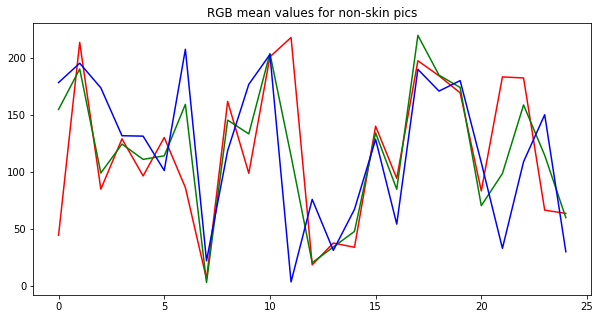

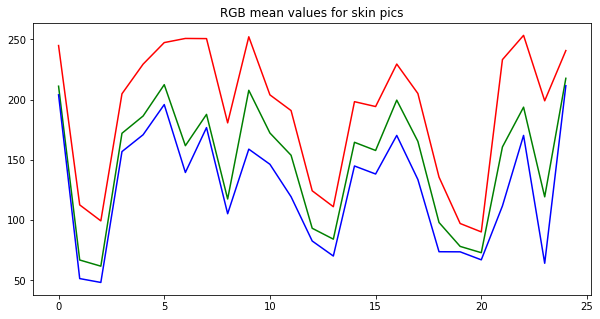

In [12]:
plt.figure(figsize=(10, 5))
plt.title('RGB mean values for non-skin pics',fontsize=12)
plt.plot(arrayR2, color = 'r')
plt.plot(arrayG2, color = 'g')
plt.plot(arrayB2, color = 'b')
plt.show()

plt.figure(figsize=(10, 5))
plt.title('RGB mean values for skin pics',fontsize=12)
plt.plot(arrayR, color = 'r')
plt.plot(arrayG, color = 'g')
plt.plot(arrayB, color = 'b')
plt.show()

Osservando i grafici dei valori RGB medi notiamo che a differenza delle altre immagini, quelle raffiguranti la pelle vanno a collocare i singoli valori sempre nello stesso ordine di quantità, infatti il valore di rosso è sempre maggiore degli altri due e il valore di verde è compreso tra il blu e il rosso. Questo perché la composizione dei 3 valori permette di ottenere sempre valori di rosa in varie gradazioni. 

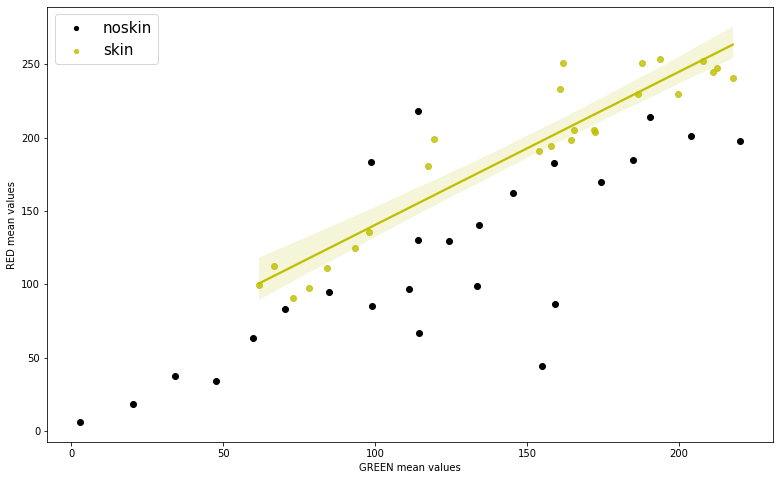

In [13]:
plt.figure(figsize=(13,8))
plt.ylabel('RED mean values')
plt.xlabel('GREEN mean values')

plt.scatter(y=arrayR2,x=arrayG2, label="noskin", color = 'black')
sns.regplot(y=arrayR,x=arrayG, label="skin", color = 'y')

plt.legend(markerscale=0.7, loc='upper left', scatterpoints=1, fontsize=15)
plt.show()

Nel secondo grafico, uno scatter raffigurane sull'asse y i valori medi di rosso e su x quelli rispettivi di verde, si riesce a notare come le immagini skin abbiano i valori raccolti in un'area molto più ristretta. Poi con la funzione regplot si è potuta visualizzare una relazione lineare dei punti determinata attraverso la regressione. 

Se andassimo a calcolare in forma numerica il rapporto tra valore rosso e verde medio dell'immagine otterremmo il coefficiente angolare della retta passante per tale punto che se dovesse risultare vicino a quello determinato dalla regressione lineare ci permetterebbe con buona probabilità di identificare l'immagine come skin. 

# Conclusione 

Concludendo, possiamo dire di essere riusciti a trovare i pixel corrispondenti alla pelle in un'immagine, usando diversi spazi di colore ed esempi. Abbiamo notato come in immagini con persone con pelle di colori molto diversi vi sia difficoltà ad ottenere un risultato preciso nonostante l'uso di filtri morfologici.
Abbiamo inoltre notato come i valori rgb medi si collocano nel grafico nel caso di immagini raffiguranti pelle e non, osservando le nette differenze e motivandole. Infine nello scatter vengono visualizzati i punti rosso/verde medi di ogni foto e si nota come per le immagini raffiguranti pelle i valori siano contenuti in un area più piccola.